# Unsupervised Learning

## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importing data set

In [2]:
flower = sns.load_dataset('iris')
print(flower.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Remove the Target Feature, we will deal with Descriptive features only.

In [3]:
descriptive_features = flower.iloc[:,:-1].values
descriptive_features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Finding the optimum number of clusters for k-means classification

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are. This is what the KMeans tries to minimize with each iteration.

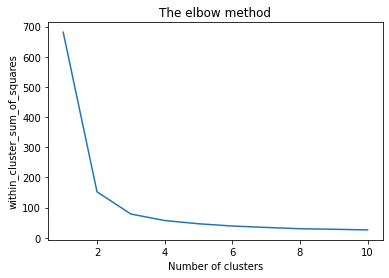

In [4]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(descriptive_features)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()


## Apply K-means Clustering

In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_prediction = kmeans.fit_predict(descriptive_features)

## Visualizing the Clusters

### Plotting on the basis of Sepal Features

In [ ]:
#Visualising the clusters
plt.scatter(descriptive_features[y_prediction == 0, 0], descriptive_features[y_prediction == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(descriptive_features[y_prediction == 1, 0], descriptive_features[y_prediction == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 0], descriptive_features[y_prediction == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], marker='X', s = 200, c = 'black', label = 'Centroids')

plt.legend()

### Plotting on the basis of Petal Features

In [ ]:
#Visualising the clusters
plt.scatter(descriptive_features[y_prediction == 0, 2], descriptive_features[y_prediction == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(descriptive_features[y_prediction == 1, 2], descriptive_features[y_prediction == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 2], descriptive_features[y_prediction == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], marker='X', s = 200, c = 'black', label = 'Centroids')

plt.legend()

## Match Accuracy with Known Labels i.e Species in Iris Dataset

In [ ]:
target_feature = flower.iloc[:,-1:]
target_feature

## Changing categorical data into Numeric Data

In [ ]:
target_feature = target_feature.replace('setosa',1)
target_feature = target_feature.replace('versicolor',0)
target_feature = target_feature.replace('virginica',2)

target_feature


## Measuring Accuracy

In [ ]:
# Measuring score
from sklearn.metrics import accuracy_score
score = accuracy_score(target_feature,y_prediction)
print('Accuracy Score of K-means Classification is:', score)

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_feature,y_prediction)
cm

In [ ]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True,)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = 'Accuracy score : {0}'.format(score)
plt.title(cm_title)

## K mediods

In [ ]:
pip install scikit-learn-extra

In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
from sklearn_extra.cluster import KMedoids
k_medions = KMedoids(n_clusters=3, metric='euclidean', method='alternate', init='heuristic', max_iter=600, random_state=False)
y_prediction = k_medions.fit_predict(descriptive_features)

In [ ]:
y_prediction

## Visualizing the Clusters

### Sepal Features

In [ ]:
#Visualising the clusters
plt.scatter(descriptive_features[y_prediction == 0, 0], descriptive_features[y_prediction == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(descriptive_features[y_prediction == 1, 0], descriptive_features[y_prediction == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 0], descriptive_features[y_prediction == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(k_medions.cluster_centers_[:, 0], k_medions.cluster_centers_[:,1], marker='X', s = 200, c = 'black', label = 'Centroids')

plt.legend()

### Plotting on the basis of Petal Features

In [ ]:
#Visualising the clusters
plt.scatter(descriptive_features[y_prediction == 0, 2], descriptive_features[y_prediction == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(descriptive_features[y_prediction == 1, 2], descriptive_features[y_prediction == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(descriptive_features[y_prediction == 2, 2], descriptive_features[y_prediction == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(k_medions.cluster_centers_[:, 2], k_medions.cluster_centers_[:,3], marker='X', s = 200, c = 'black', label = 'Centroids')


plt.legend()

## Match Accuracy with Known Labels i.e Species in Iris Dataset

In [ ]:
target_feature = flower.iloc[:,-1:]
target_feature

## Changing categorical data into Numeric Data

In [ ]:
target_feature = target_feature.replace('setosa',2)
target_feature = target_feature.replace('virginica',0)
target_feature = target_feature.replace('versicolor',1)
target_feature


In [ ]:
# Measuring score
from sklearn.metrics import accuracy_score
score = accuracy_score(target_feature,y_prediction)
print('Accuracy Score of K-medoids Clustering is:', score)

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_feature,y_prediction)
cm

In [ ]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True,)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = 'Accuracy score : {0}'.format(score)
plt.title(cm_title)

## Dendograms

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(descriptive_features, method='ward'))
plt.axhline(y=3, color='b', linestyle='--')

## Aglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_prediction=cluster.fit_predict(descriptive_features)
y_prediction

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(descriptive_features[:,:-3], descriptive_features[:,1:-2], c=cluster.labels_)

plt.show()

## Getting Target Feature

In [ ]:
target_feature = flower.iloc[:,-1:]
target_feature

## Changing categorical data into Numeric Data

In [ ]:
target_feature = target_feature.replace('setosa',1)
target_feature = target_feature.replace('virginica',2)
target_feature = target_feature.replace('versicolor',0)
target_feature


In [ ]:
# Measuring score
from sklearn.metrics import accuracy_score
score = accuracy_score(target_feature,y_prediction)
print('Accuracy Score of Aglomerative Clustering is:', score)

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_feature,y_prediction)
cm

In [ ]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True,)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
cm_title = 'Accuracy score : {0}'.format(score)
plt.title(cm_title)

## DB SCAN with Data Points in Circular pattern

In [ ]:
import math
import matplotlib.pyplot as plt
import matplotlib

### Create Datapoints in a form of Circle

In [ ]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [ ]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

### Plotting datapoints

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
plt.show()

### Clustering on the basis of K-Means

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.ylabel = 'Actual Output'
plt.xlabel = 'Predicted Output'
plt.show()

### Clustering Based on Aglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.show()

### DB Scan method

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.show()

# Neural Networks